In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [ ]:
# Đọc dữ liệu từ file CSV trên Kaggle
data = pd.read_csv('/kaggle/input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv')

NameError: name 'pd' is not defined

In [3]:
# Hiển thị thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print(data.info())
print("\n5 dòng đầu tiên của dữ liệu:")
print(data.head())

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

5 dòng đầu tiên của dữ liệu:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175

In [4]:
# Tách đặc trưng (features) và nhãn (label)
X = data.drop('label', axis=1)  # Các cột N, P, K, temperature, humidity, ph, rainfall
y = data['label']  # Cột nhãn (loại cây trồng)

In [5]:
# Mã hóa nhãn (label) thành số
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [7]:
# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Khởi tạo và huấn luyện mô hình LGBM Classifier với tham số tối ưu
model = LGBMClassifier(
    n_estimators=200,        # Số cây quyết định
    learning_rate=0.05,      # Tốc độ học
    max_depth=10,            # Độ sâu tối đa của cây
    random_state=42
)
model.fit(X_train_scaled, y_train)

LGBMClassifier(learning_rate=0.05, max_depth=10, n_estimators=200,
               random_state=42)

In [9]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

In [10]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác trên tập kiểm tra: {accuracy * 100:.2f}%")


Độ chính xác trên tập kiểm tra: 98.64%


In [11]:
# Báo cáo chi tiết (precision, recall, f1-score)
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Báo cáo phân loại:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      p

In [12]:
# Đánh giá bằng cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"\nĐộ chính xác trung bình từ cross-validation (5-fold): {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")



Độ chính xác trung bình từ cross-validation (5-fold): 98.81% ± 0.87%


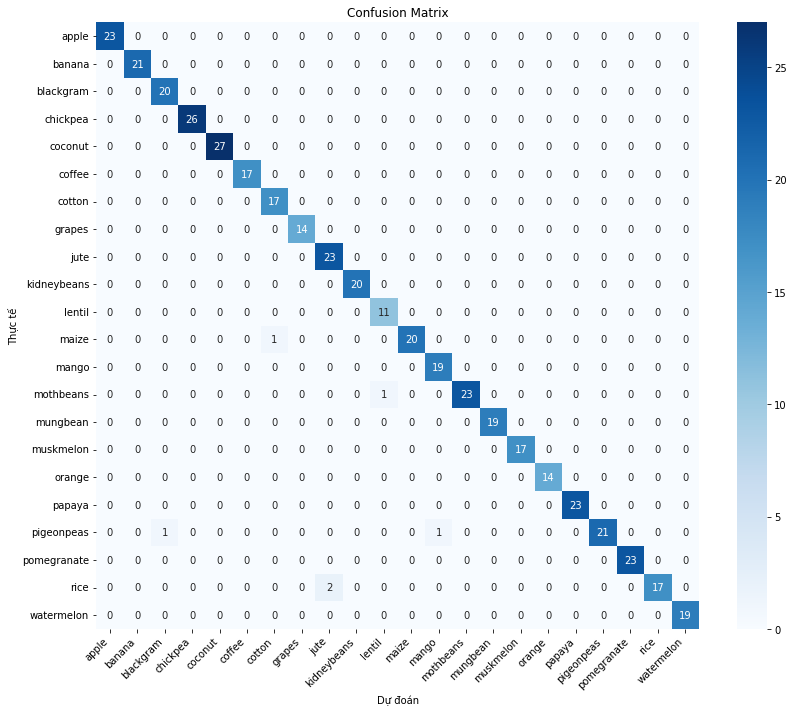

In [13]:
# Vẽ Confusion Matrix để phân tích lỗi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
# Ví dụ dự đoán cho một mẫu dữ liệu mới
new_data = pd.DataFrame(
    [[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]],
    columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
)
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
predicted_crop = label_encoder.inverse_transform(prediction)[0]
print(f"\nDự đoán loại cây trồng cho mẫu mới: {predicted_crop}")


Dự đoán loại cây trồng cho mẫu mới: rice


In [15]:
# Lưu mô hình, scaler và label encoder
joblib.dump(model, 'lgbm_crop_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("\nĐã lưu mô hình, scaler và label encoder thành file .pkl")


Đã lưu mô hình, scaler và label encoder thành file .pkl
